In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

#prepeocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = '/content/drive/MyDrive/internship/heart_disease_uci.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())

# Inspect the dataset
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Define features and target
X = df.drop(columns=['num'])  # 'num' is the target column
y = df['num']

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'bool']).columns

# Define preprocessing for numerical features (impute missing values, then scale)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical features (impute missing values, then one-hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

print("Preprocessing complete.")

# Convert the preprocessed data back to a DataFrame for inspection (optional)
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed)

print(X_train_preprocessed_df.head())


   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
<class '

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None
               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  

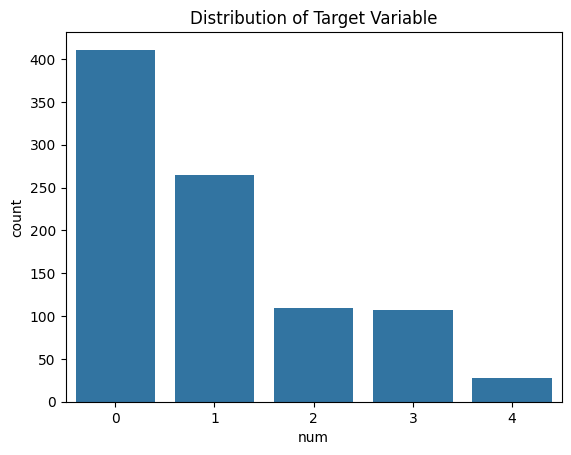

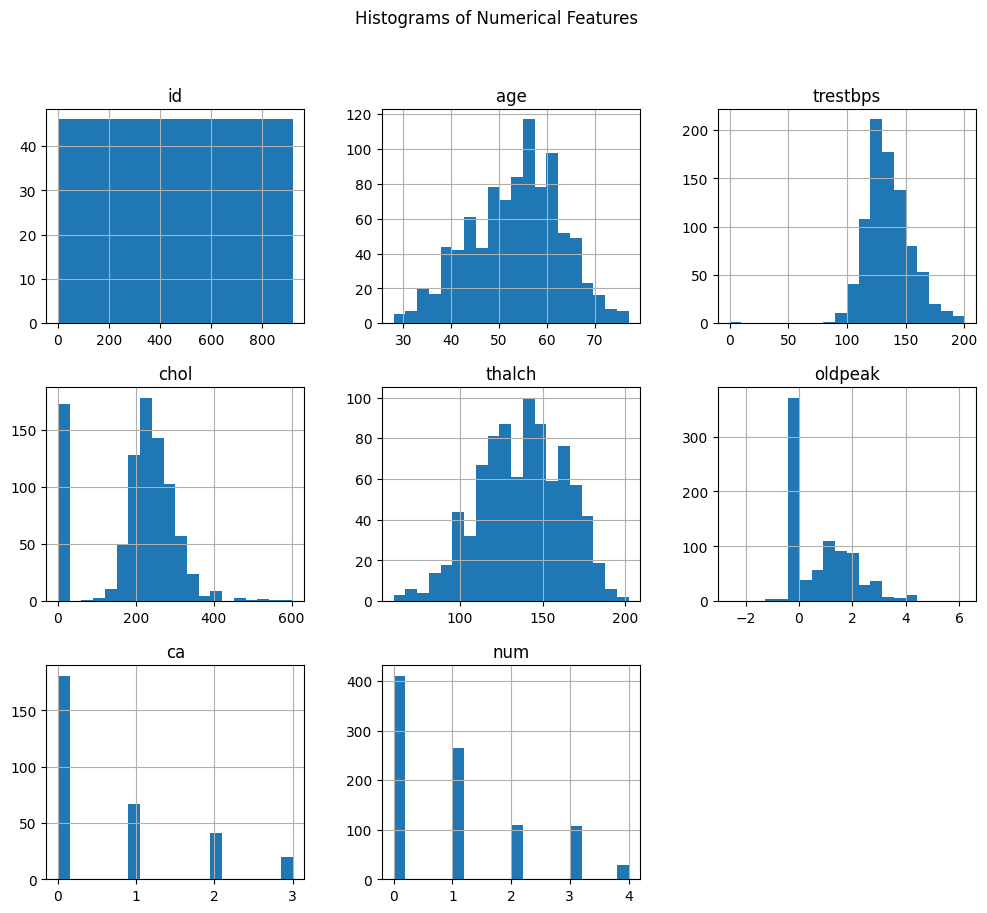

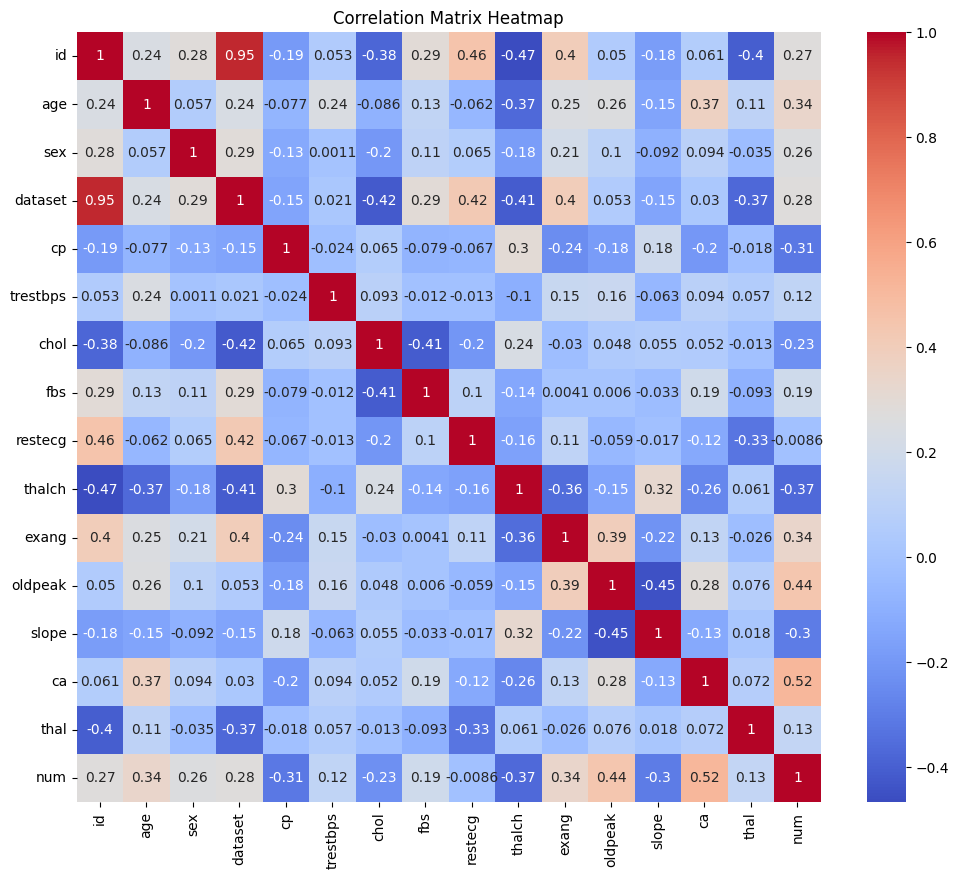

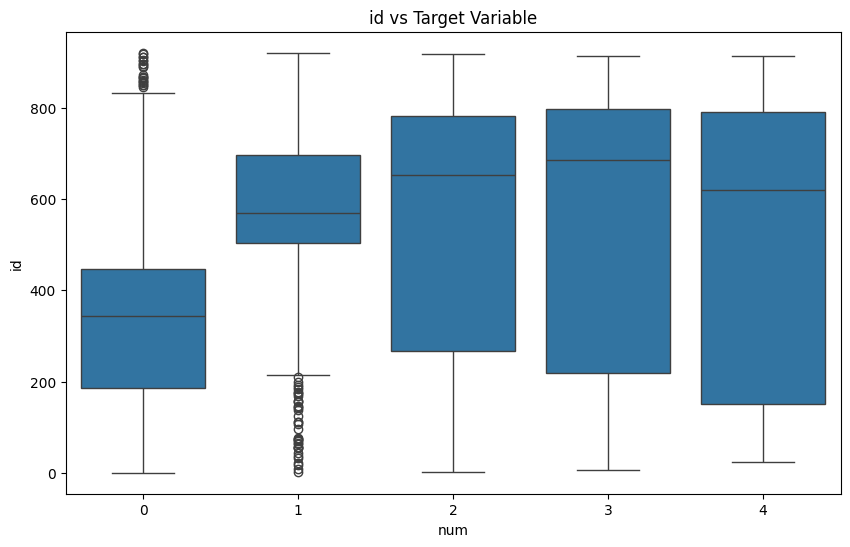

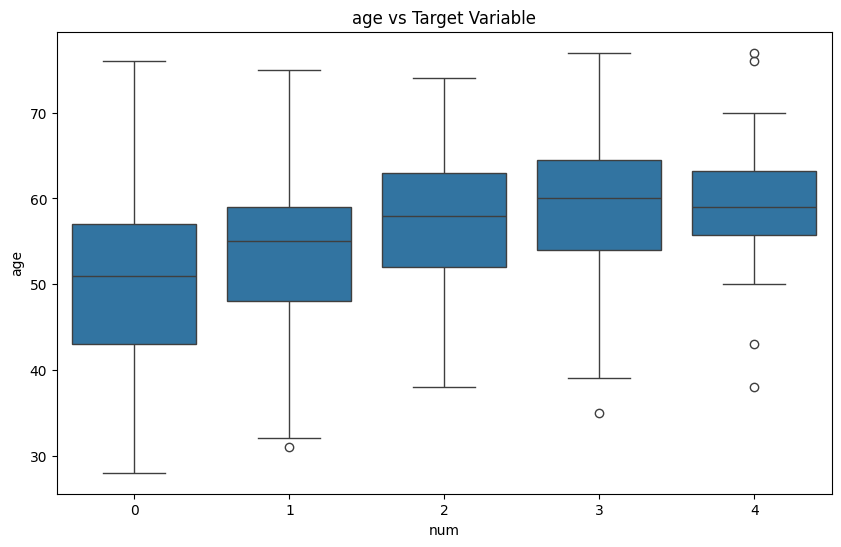

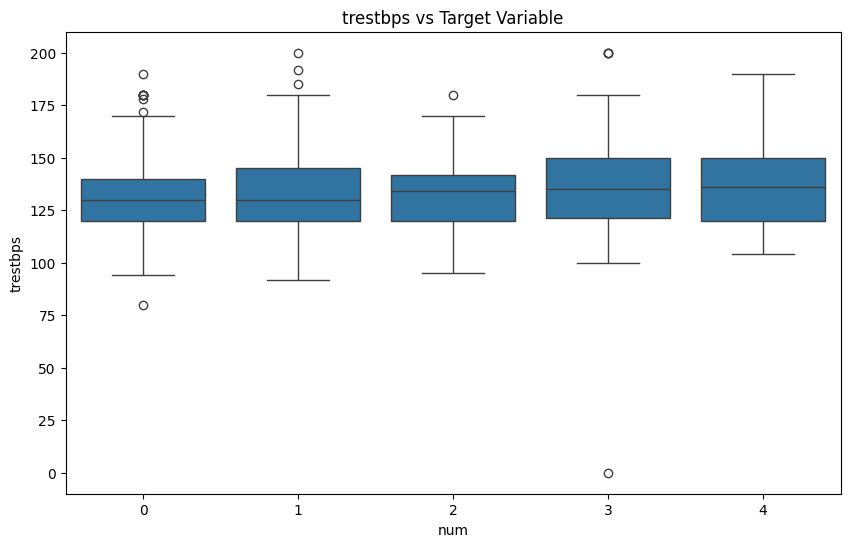

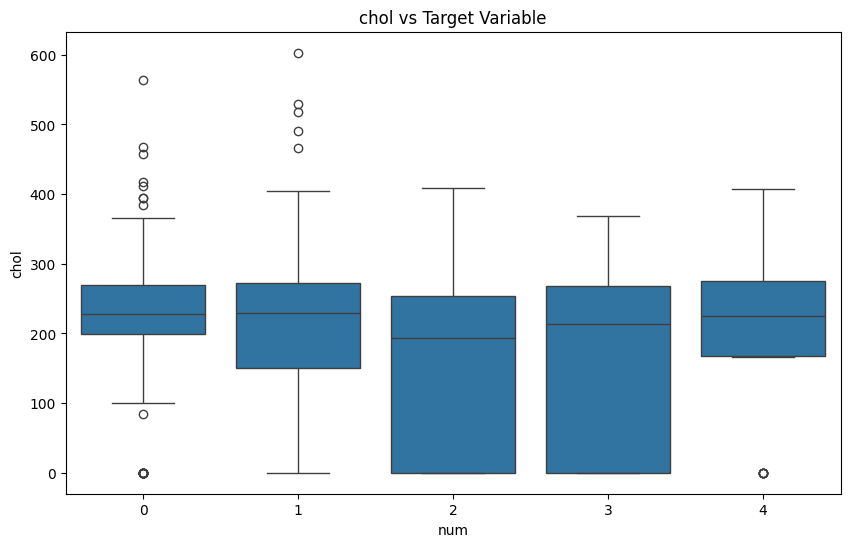

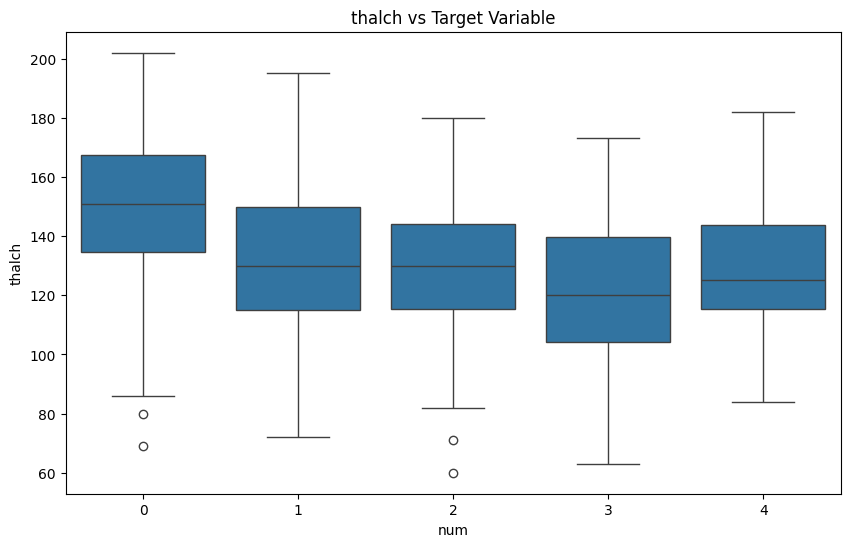

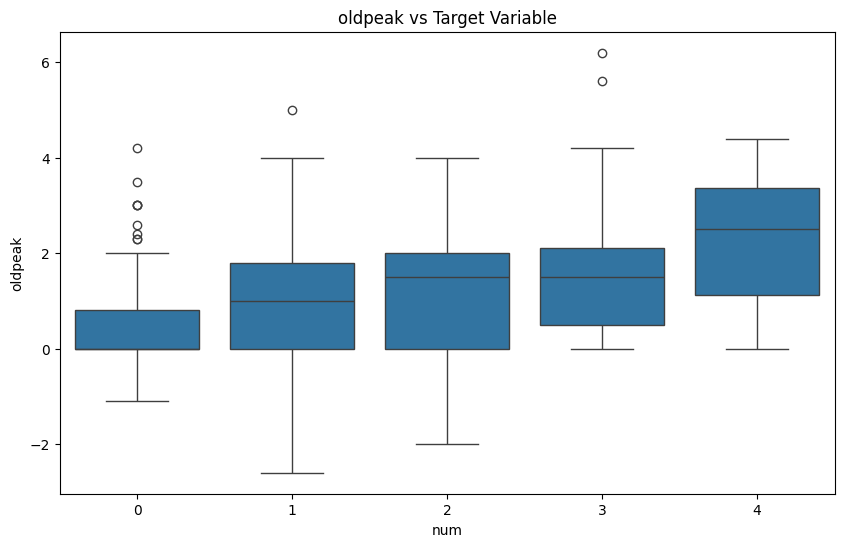

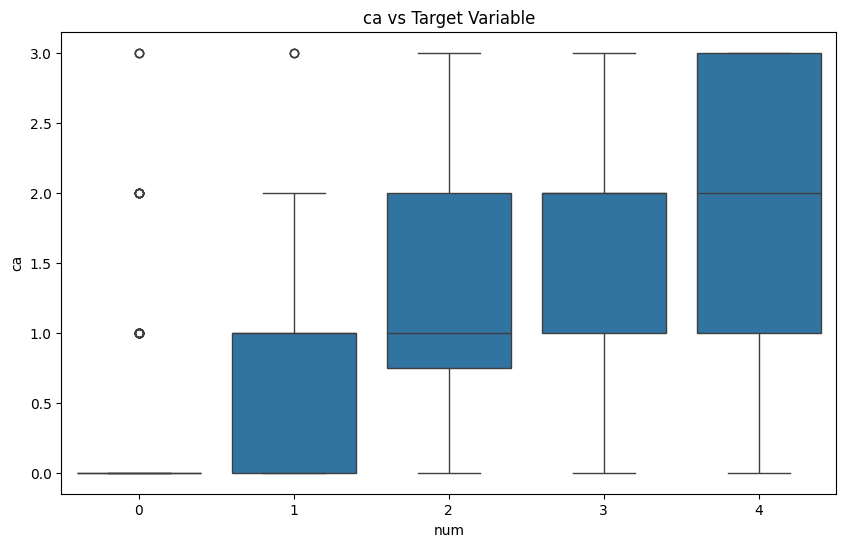

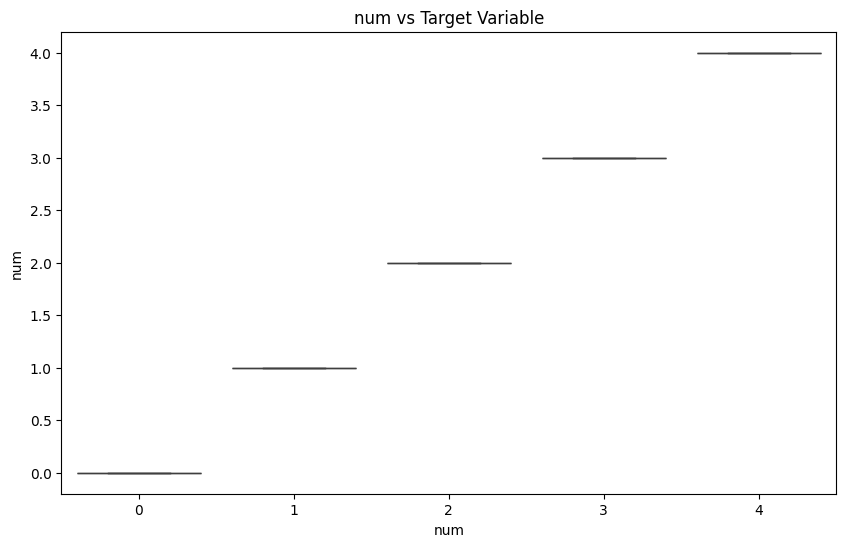

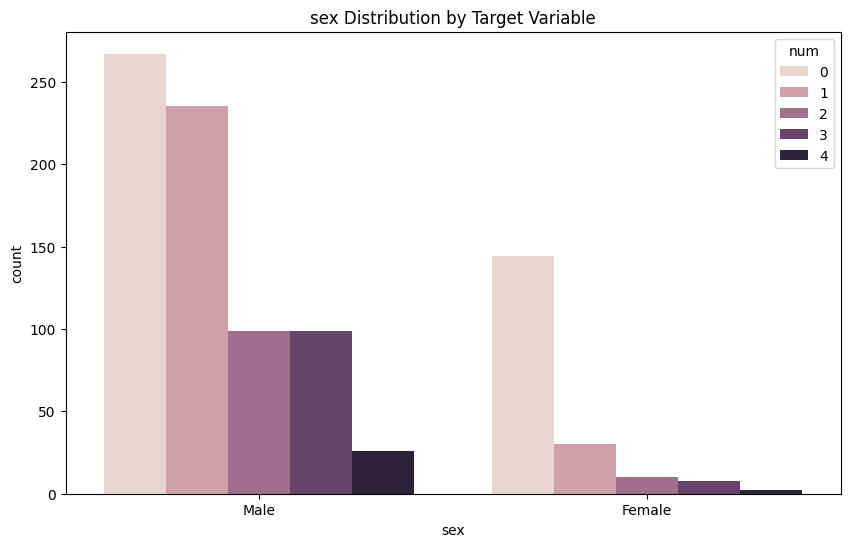

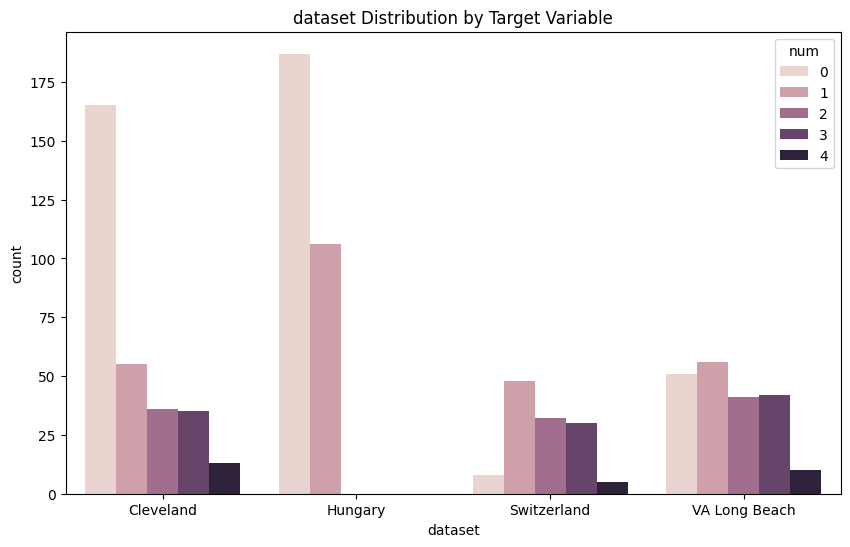

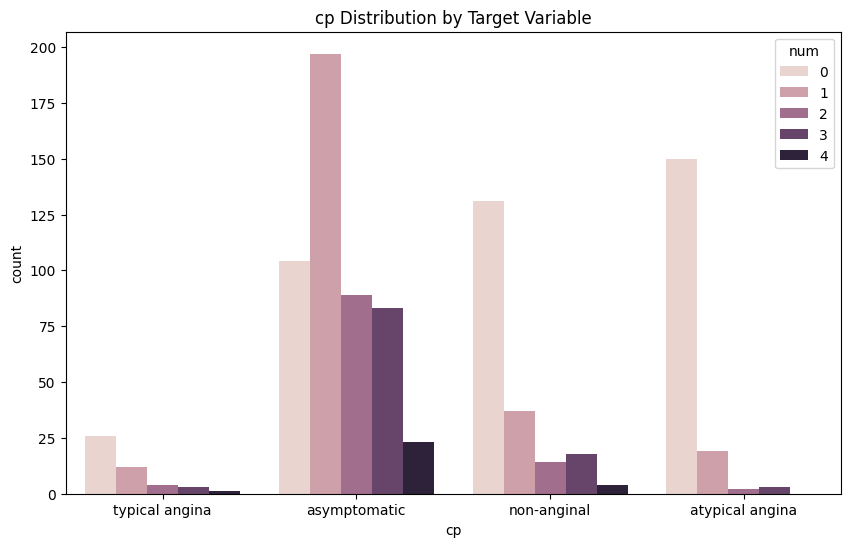

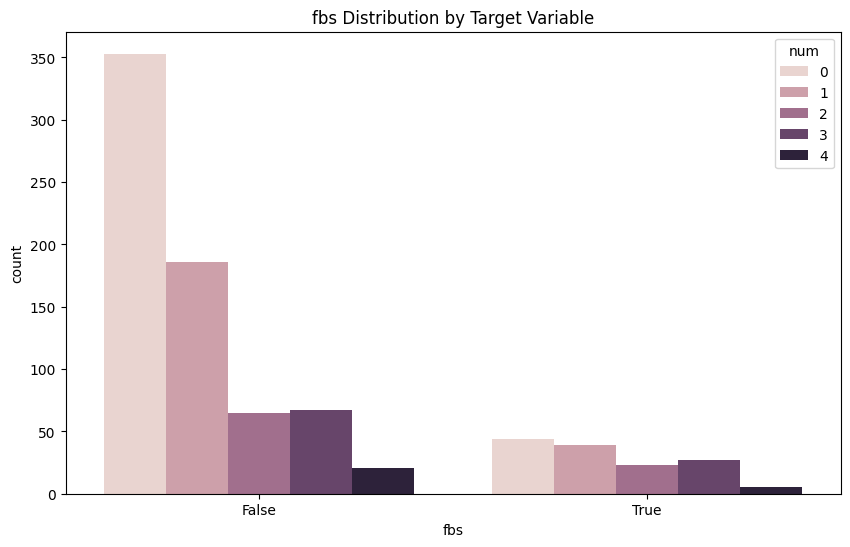

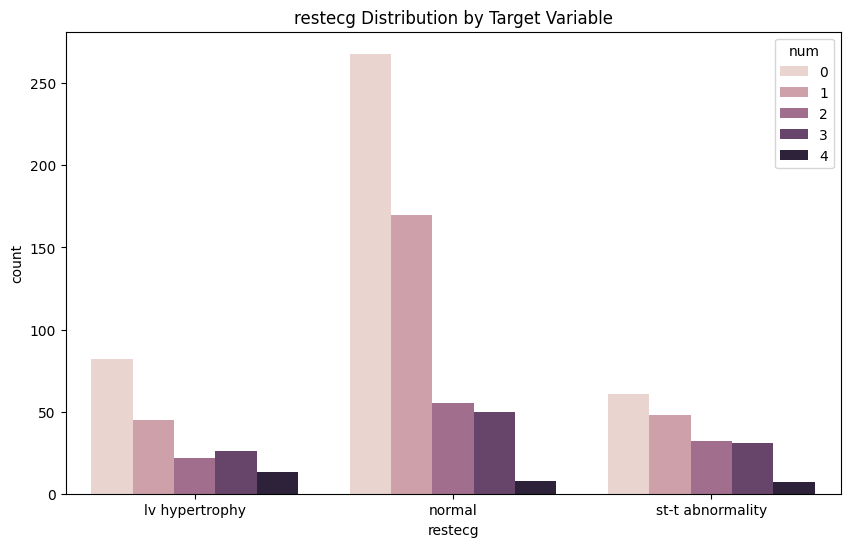

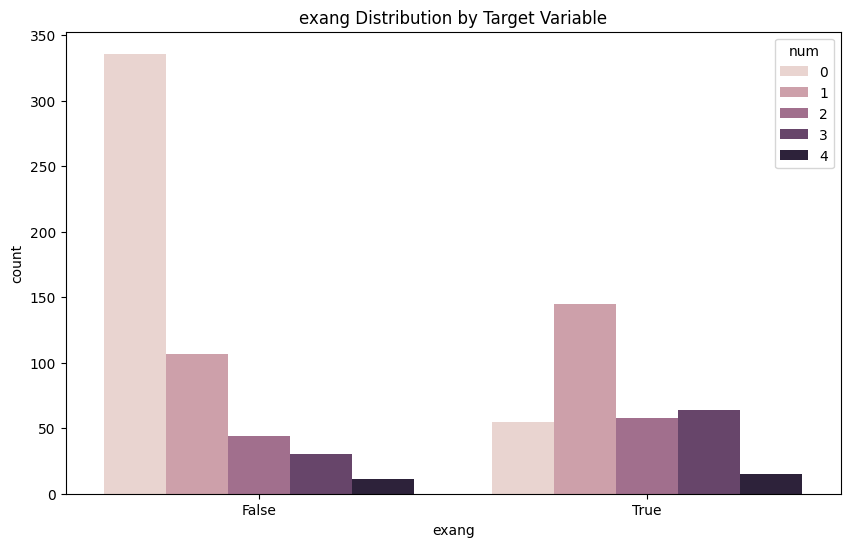

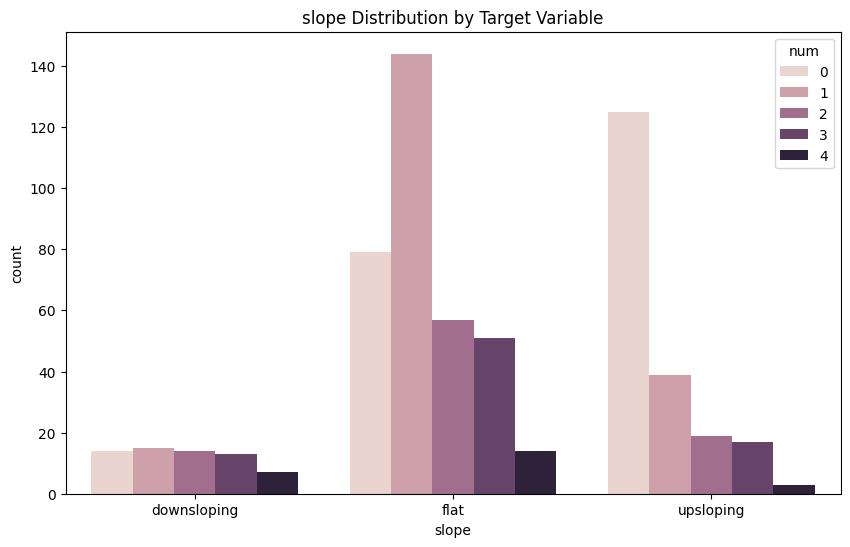

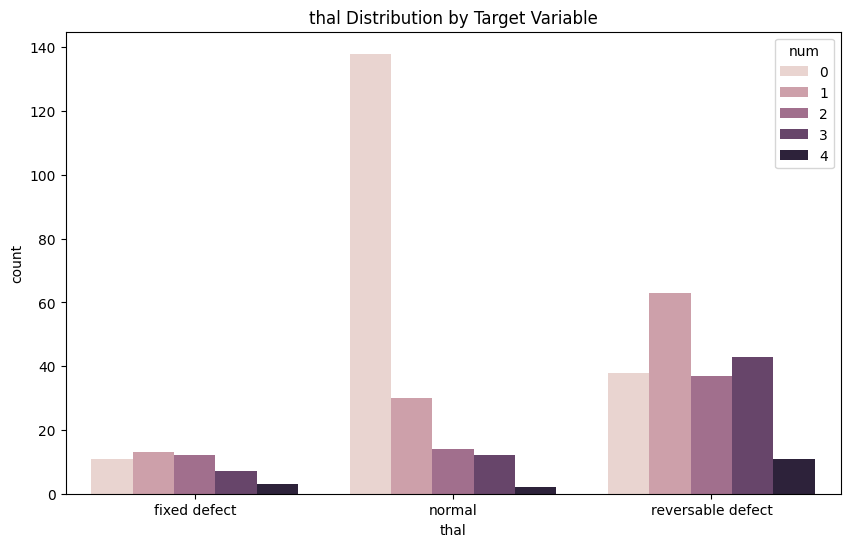

In [3]:
#Eda
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Reload the dataset
file_path = '/content/drive/MyDrive/internship/heart_disease_uci.csv'
df = pd.read_csv(file_path)

# Display basic information and statistics
print(df.info())
print(df.describe())

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Visualize the distribution of the target variable
sns.countplot(x='num', data=df)
plt.title('Distribution of Target Variable')
plt.show()

# Visualize the distribution of numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features].hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Encode categorical variables for correlation analysis
df_encoded = df.copy()
categorical_features = df_encoded.select_dtypes(include=['object', 'bool']).columns

label_encoders = {}
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    df_encoded[feature] = label_encoders[feature].fit_transform(df_encoded[feature].astype(str))

# Visualize correlations using a heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Visualize relationships between numerical features and the target variable
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='num', y=feature, data=df)
    plt.title(f'{feature} vs Target Variable')
    plt.show()

# Visualize the distribution of categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='num', data=df)
    plt.title(f'{feature} Distribution by Target Variable')
    plt.show()


In [4]:
#naive bayes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
file_path = '/content/drive/MyDrive/internship/heart_disease_uci.csv'
df = pd.read_csv(file_path)

# Define features and target
X = df.drop(columns=['num'])  # 'num' is the target column
y = df['num']

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'bool']).columns

# Define preprocessing for numerical features (impute missing values, then scale)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical features (impute missing values, then one-hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing to the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_preprocessed, y_train)

# Make predictions
y_train_pred = nb_model.predict(X_train_preprocessed)
y_test_pred = nb_model.predict(X_test_preprocessed)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))



Training Accuracy: 0.4116847826086957
Testing Accuracy: 0.3858695652173913
Confusion Matrix:
 [[54  2  0  0 19]
 [ 8 13  0  0 33]
 [ 0  0  0  0 25]
 [ 1  0  0  0 25]
 [ 0  0  0  0  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.72      0.78        75
           1       0.87      0.24      0.38        54
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        26
           4       0.04      1.00      0.07         4

    accuracy                           0.39       184
   macro avg       0.35      0.39      0.25       184
weighted avg       0.60      0.39      0.43       184



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
#feature  tranformation
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
file_path = '/content/drive/MyDrive/internship/heart_disease_uci.csv'
df = pd.read_csv(file_path)

# Define features and target
X = df.drop(columns=['num'])  # 'num' is the target column
y = df['num']

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'bool']).columns

# Define preprocessing for numerical features (impute missing values, then scale)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical features (impute missing values, then one-hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing to the training and testing data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_preprocessed, y_train)

# Make predictions
y_train_pred = nb_model.predict(X_train_preprocessed)
y_test_pred = nb_model.predict(X_test_preprocessed)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Training Accuracy: 0.4116847826086957
Testing Accuracy: 0.3858695652173913
Confusion Matrix:
 [[54  2  0  0 19]
 [ 8 13  0  0 33]
 [ 0  0  0  0 25]
 [ 1  0  0  0 25]
 [ 0  0  0  0  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.72      0.78        75
           1       0.87      0.24      0.38        54
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        26
           4       0.04      1.00      0.07         4

    accuracy                           0.39       184
   macro avg       0.35      0.39      0.25       184
weighted avg       0.60      0.39      0.43       184



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
#feature generation
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_classif

# Load the dataset
file_path = '/content/drive/MyDrive/internship/heart_disease_uci.csv'
df = pd.read_csv(file_path)

# Define features and target
X = df.drop(columns=['num'])  # 'num' is the target column
y = df['num']

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'bool']).columns

# Define preprocessing for numerical features (impute missing values, then scale, and create polynomial features)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('select', SelectKBest(f_classif, k=10))  # Select top 10 features
])

# Define preprocessing for categorical features (impute missing values, then one-hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a preprocessing and modeling pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict using the model
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Training Accuracy: 0.45108695652173914
Testing Accuracy: 0.41304347826086957
Confusion Matrix:
 [[57  1  1  0 16]
 [10 12  4  0 28]
 [ 0  0  3  0 22]
 [ 1  0  3  0 22]
 [ 0  0  0  0  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80        75
           1       0.92      0.22      0.36        54
           2       0.27      0.12      0.17        25
           3       0.00      0.00      0.00        26
           4       0.04      1.00      0.08         4

    accuracy                           0.41       184
   macro avg       0.42      0.42      0.28       184
weighted avg       0.65      0.41      0.45       184



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
#feature scaling
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
file_path = '/content/drive/MyDrive/internship/heart_disease_uci.csv'
df = pd.read_csv(file_path)

# Define features and target
X = df.drop(columns=['num'])  # 'num' is the target column
y = df['num']

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'bool']).columns

# Define preprocessing for numerical features (impute missing values, then scale)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical features (impute missing values, then one-hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing to the training and testing data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_preprocessed, y_train)

# Make predictions
y_train_pred = nb_model.predict(X_train_preprocessed)
y_test_pred = nb_model.predict(X_test_preprocessed)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Training Accuracy: 0.4116847826086957
Testing Accuracy: 0.3858695652173913
Confusion Matrix:
 [[54  2  0  0 19]
 [ 8 13  0  0 33]
 [ 0  0  0  0 25]
 [ 1  0  0  0 25]
 [ 0  0  0  0  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.72      0.78        75
           1       0.87      0.24      0.38        54
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        26
           4       0.04      1.00      0.07         4

    accuracy                           0.39       184
   macro avg       0.35      0.39      0.25       184
weighted avg       0.60      0.39      0.43       184



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
#hyper parameter tuning
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
file_path = '/content/drive/MyDrive/internship/heart_disease_uci.csv'
df = pd.read_csv(file_path)

# Define features and target
X = df.drop(columns=['num'])  # 'num' is the target column
y = df['num']

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'bool']).columns

# Define preprocessing for numerical features (impute missing values, then scale)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical features (impute missing values, then one-hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a preprocessing and modeling pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
}

# Set up Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Grid Search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Predict using the best model
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Best Parameters: {'classifier__var_smoothing': 0.0001}
Best Cross-Validation Score: 0.4701047986762273
Training Accuracy: 0.5461956521739131
Testing Accuracy: 0.4945652173913043
Confusion Matrix:
 [[58  2  5  4  6]
 [12 14  9  5 14]
 [ 0  2  9  5  9]
 [ 2  0  8  7  9]
 [ 0  0  1  0  3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79        75
           1       0.78      0.26      0.39        54
           2       0.28      0.36      0.32        25
           3       0.33      0.27      0.30        26
           4       0.07      0.75      0.13         4

    accuracy                           0.49       184
   macro avg       0.45      0.48      0.38       184
weighted avg       0.64      0.49      0.52       184



In [10]:
#polynomial feature
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
file_path = '/content/drive/MyDrive/internship/heart_disease_uci.csv'
df = pd.read_csv(file_path)

# Define features and target
X = df.drop(columns=['num'])  # 'num' is the target column
y = df['num']

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'bool']).columns

# Define preprocessing for numerical features (impute missing values, then scale, and create polynomial features)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

# Define preprocessing for categorical features (impute missing values, then one-hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a preprocessing and modeling pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict using the model
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Training Accuracy: 0.5380434782608695
Testing Accuracy: 0.483695652173913
Confusion Matrix:
 [[60  2 10  0  3]
 [16 13 16  1  8]
 [ 1  1 13  1  9]
 [ 4  1 15  0  6]
 [ 0  0  1  0  3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77        75
           1       0.76      0.24      0.37        54
           2       0.24      0.52      0.33        25
           3       0.00      0.00      0.00        26
           4       0.10      0.75      0.18         4

    accuracy                           0.48       184
   macro avg       0.37      0.46      0.33       184
weighted avg       0.56      0.48      0.47       184

